In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *

In [2]:
def GaussSet(mean1, mean2, var, n):
    data11 = np.random.multivariate_normal(mean1, var, n)
    data12 = np.random.multivariate_normal(mean2, var, n)

    data1 = np.array(zeros((2*n, 3)))
    for i in range(n):
        data1[i,0] = data11[i,0]
        data1[i,1] = data11[i,1]
        data1[i + n,0] = data12[i,0]
        data1[i + n,1] = data12[i,1]
        data1[i,2] = 1
        data1[i + n,2] = 2
        

    return data1
    

In [5]:
m00 = [-2, 0]
v00 = np.array([[2 ,0],[0,3]])

m01 = [2, 0]
v01 = np.array([[2, 0], [0, 3]])



data_set_1 = GaussSet(m00, m01, v00, 20)
data_set_2 = GaussSet(m00, m01, v00, 100)
data_set_3 = GaussSet(m00, m01, v00, 1000)

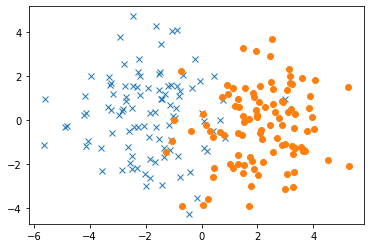

In [6]:
plt.plot(data_set_2[:100,0], data_set_2[:100,1], 'x')
plt.plot(data_set_2[100:,0], data_set_2[100:,1], 'o')

In [3]:
def cross_val(data, n):

    fold_array = np.zeros(len(data))
    folds = n
    size_folds = len(data)/folds

    index = np.arange(len(data))
    np.random.shuffle(index)

    for f in range(n):
        start = f*size_folds
        end = (f+1)*size_folds
        ind = index[int(start):int(end)]

        fold_array[ind] = f

    acc = np.zeros(n)

    for f in range(n):
        data_train = data[fold_array != f, :]
        data_test = data[fold_array == f, :]

        class_train = data_train[:, 2]
        class_test = data_test[:, 2]

        idx_c1 = np.transpose(np.where(class_train == 1))
        idx_c2 = np.transpose(np.where(class_train == 2))

        m_1, m_2 = np.zeros(2), np.zeros(2)
        s_1, s_2 = np.zeros(2), np.zeros(2)

        prior1 = np.sum(class_train == 1)/len(class_train)
        prior2 = np.sum(class_train == 2)/len(class_train)
        
          #Mean & sd for C1
        m_1[0], s_1[0] = np.mean(data_train[idx_c1, 0]), np.std(data_train[idx_c1, 0])
        m_1[1], s_1[1] = np.mean(data_train[idx_c1, 1]), np.std(data_train[idx_c1, 1])

        #Mean & sd for C2
        m_2[0], s_2[0] = np.mean(data_train[idx_c2, 0]), np.std(data_train[idx_c2, 0])
        m_2[1], s_2[1] = np.mean(data_train[idx_c2, 1]), np.std(data_train[idx_c2, 1])

        est_type = np.zeros(len(data_test))

        p1 , p2 = np.zeros(2), np.zeros(2)

        for i in range(len(data_test)):

            for feat in range(2):

                x = data_test[i][feat]

                p1[feat] =  1/(s_1[feat] * np.sqrt(2 * np.pi)) * np.exp(-0.5*(x - m_1[feat])**2/s_1[feat]**2)

                p2[feat] =  1/(s_2[feat] * np.sqrt(2 * np.pi)) * np.exp(-0.5*(x - m_2[feat])**2/s_2[feat]**2)

            P1 = prior1 * np.prod(p1)
            P2 = prior2 * np.prod(p2)

            est_type[i] = np.argmax([P1, P2]) + 1

        acc[f] = np.sum(est_type == class_test)/len(data_test)
    
    
    return acc


In [8]:
acc1 = cross_val(data_set_1, 10)
acc2 = cross_val(data_set_2, 10)
acc3 = cross_val(data_set_3, 10)
avg1 = np.mean(acc1)
avg2 = np.mean(acc2)
avg3 = np.mean(acc3)

In [9]:
print('Average accuracy for Data set 1: ' + str(avg1))
print('Average accuracy for Data set 2: ' + str(avg2))
print('Average accuracy for Data set 3: ' + str(avg3))

Average accuracy for Data set 1: 0.95
Average accuracy for Data set 2: 0.925
Average accuracy for Data set 3: 0.922


In [16]:
m10 = [-2, 0]
v10 = np.array([[2 ,-1.8],[-1.8,3]])

m11 = [2, 0]
v11 = np.array([[2, -1.8], [-1.8, 3]])

data_set_4 = GaussSet(m10, m11, v10, 20)
data_set_5 = GaussSet(m10, m11, v10, 100)
data_set_6 = GaussSet(m10, m11, v10, 1200)

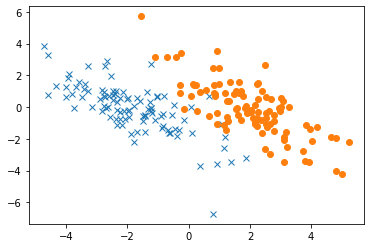

In [17]:
plt.plot(data_set_5[:100,0], data_set_5[:100,1], 'x')
plt.plot(data_set_5[100:,0], data_set_5[100:,1], 'o')

In [18]:
acc4 = cross_val(data_set_4, 10)
acc5 = cross_val(data_set_5, 10)
acc6 = cross_val(data_set_6, 10)
avg4 = np.mean(acc4)
avg5 = np.mean(acc5)
avg6 = np.mean(acc6)

In [19]:
print('Average accuracy for Data set 1: ' + str(avg1))
print('Average accuracy for Data set 2: ' + str(avg2))
print('Average accuracy for Data set 3: ' + str(avg3))

Average accuracy for Data set 1: 0.95
Average accuracy for Data set 2: 0.925
Average accuracy for Data set 3: 0.922
